1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/usuarios_win_mac_lin.csv")

In [3]:
#y = target
y = df['duracion']
X = df[["paginas", "acciones", "valor", "clase"]]

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
paginas,44.706427
acciones,4.313329
valor,-1.068234
clase,37.458990


In [19]:
y_predictions = model.predict(X_test)
y_predictions

array([ 40.53750743,  48.33829467,  78.87492649, 159.06545207,
       107.86883444, 159.63315332, 166.69249886,  78.87492649,
       435.19557023, 123.01391119,  83.71337593,  33.22144696,
       117.63234867,  47.22966705,  35.27712661, 119.76881612,
       119.80921002, 116.41470423,  83.71337593, 119.80921002,
        38.64340337,  38.64340337, 313.8729494 , 122.25057777,
        23.68813124,  85.28432883,  78.87492649,  47.06809146,
        34.16849899, 171.04622154, 198.6022647 ,  89.71883931,
        47.22966705,  75.94081773])

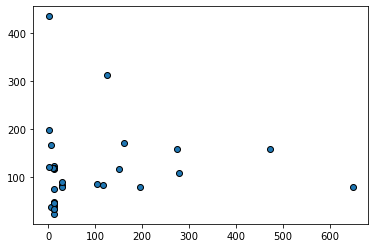

In [21]:
plt.scatter(y_test, y_predictions, edgecolor='black')
# Seems the model does not work correctly?

1. ¿Qué acierto tiene? (score)

In [25]:
model.score(X, y)

0.0953388415245322

2. ¿Cuál es el RMSE? ¿Dirías que es un valor alto?

In [27]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_predictions))

159.48037208507807

Yes, it seems like a very high value.

3. Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?


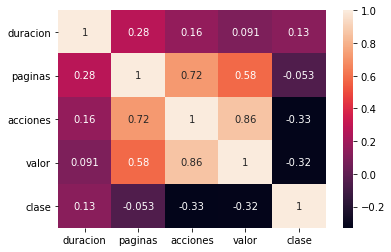

In [30]:
sns.heatmap(df.corr(),  annot = True)

There is not much correlation between duracion and the other columns. 

¿Es la regresión un buen método para este dataset?

I don´t think the linear regression method is correct for this dataset, as there is not enough correlation between the duration and the other columns to draw make a good prediction. 